In [1]:
import pandas as pd
pd.options.display.max_columns = 100

In [2]:
# The reason for the below is because only the fully processed experiment mutation sets contain the data necessary for the below plots.
# The mutation set here will also be less than that of 4_df because we've removed GLU's hypermutators before execute NB6-12 on GLU.
all_mut_df = pd.DataFrame()
exp_data_files = [
    "./data/PGI_df.pkl",
    "./data/GLU_df.pkl",
    "./data/GYD_df.pkl",
    "./data/42C_df.pkl",
    "./data/SER_df.pkl",
    "./data/C13_df.pkl",
    "./data/SSW_AC_df.pkl",
    "./data/SSW_GLY_df.pkl",
    "./data/SSW_XYL_df.pkl",
    "./data/SSW_GLU_AC_df.pkl",
    "./data/SSW_GLU_GLY_df.pkl",
    "./data/SSW_GLU_XYL_df.pkl",
    "./data/Central_carbon_knockout_tpiA_df.pkl",
    "./data/Central_carbon_knockout_PTS_df.pkl",
    "./data/Central_carbon_knockout_pgi_df.pkl",
    "./data/Central_carbon_knockout_sdh_df.pkl",
    "./data/Central_carbon_knockout_gnd_df.pkl",
    "./data/Central_carbon_knockout_glucose_evolution_df.pkl",
]
for exp_data_file in exp_data_files:
    all_mut_df = all_mut_df.append(pd.read_pickle(exp_data_file), sort=True)
display(len(all_mut_df), all_mut_df.head())

1278

,COG links,COGs,Details,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,carbon-source,coding,exp,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,promoter,pseudogene,range,regulator links,regulators,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator
778,{'Energy production and conversion': ['ECK1200...,"[{'name': 'Energy production and conversion', ...",intergenic (‑75/‑446),MOB,1677978,{},NaN,IS5 (+) +4 bp,{},1,{},M9,glucose(2),False,PGI,50,{},False,{'ECK120000735/ECK120003449': ['ECK120010629']},"[{'RegulonDB ID': 'ECK120000735/ECK120003449',...","[{'name': 'pntAp', 'RegulonDB ID': 'ECK1200106...",1,1,pntA/ydgH,NH4Cl(2),{'ECK120014614': ['ECK120000735/ECK120003449']},"[{'name': 'pntAB', 'RegulonDB ID': 'ECK1200146...",False,{'Nicotinate and nicotinamide metabolism': ['E...,[{'name': 'Nicotinate and nicotinamide metabol...,KH2PO4(6) Na2HPO4(13.6),1.0,{ECK120010629},False,"(1677978, 1677978)",{},[],Δpgi,MgSO4(24),NaCl(1g/L) trace elements,511145,1,37 celsius,{}
779,{'Lipid transport and metabolism': ['ECK125166...,"[{'name': 'Lipid transport and metabolism', 'm...",P56L (CCT→CTT),SNP,202267,{},NaN,C→T,{},1,{},M9,glucose(2),True,PGI,50,{ECK120001257},True,{'ECK120001257': ['ECK120001257']},"[{'name': 'fabZ', 'RegulonDB ID': 'ECK12000125...","[{'name': 'fabZ', 'RegulonDB ID': 'ECK12000125...",0,1,fabZ,NH4Cl(2),{'ECK125166138': ['ECK120001257']},[{'name': 'bamA-skp-lpxD-fabZ-lpxAB-rnhB-dnaE'...,False,"{'Fatty acid biosynthesis': ['ECK125166138'], ...","[{'name': 'Fatty acid biosynthesis', 'mutation...",KH2PO4(6) Na2HPO4(13.6),1.0,{},False,"(202267, 202267)",{'CpxR': ['bamA-skp-lpxD-fabZ-lpxAB-rnhB-dnaE'...,"[{'name': 'CpxR', 'significantly associated co...",Δpgi,MgSO4(24),NaCl(1g/L) trace elements,511145,1,37 celsius,{}
780,"{'Replication, recombination and repair': ['EC...","[{'name': 'Replication, recombination and repa...",I81S (ATC→AGC),SNP,3960918,{},NaN,T→G,{},1,{},M9,glucose(2),True,PGI,50,{ECK120000828},True,{'ECK120000828': ['ECK120000828']},"[{'name': 'rep', 'RegulonDB ID': 'ECK120000828...","[{'name': 'rep', 'RegulonDB ID': 'ECK120000828...",2,1,rep,NH4Cl(2),{'ECK120014997': ['ECK120000828']},"[{'name': 'rep', 'RegulonDB ID': 'ECK120014997...",False,{},[],KH2PO4(6) Na2HPO4(13.6),1.0,{},False,"(3960918, 3960918)",{},[],Δpgi,MgSO4(24),NaCl(1g/L) trace elements,511145,1,37 celsius,{}
781,{'Energy production and conversion': ['ECK1200...,"[{'name': 'Energy production and conversion', ...",S317G (AGC→GGC),SNP,4159842,{},NaN,T→C,{},1,{},M9,glucose(2),True,PGI,50,{ECK120001392},True,{'ECK120001392': ['ECK120001392']},"[{'name': 'sthA', 'RegulonDB ID': 'ECK12000139...","[{'name': 'sthA', 'RegulonDB ID': 'ECK12000139...",3,1,sthA,NH4Cl(2),{'ECK120015926': ['ECK120001392']},"[{'name': 'sthA', 'RegulonDB ID': 'ECK12001592...",False,{'Nicotinate and nicotinamide metabolism': ['E...,[{'name': 'Nicotinate and nicotinamide metabol...,KH2PO4(6) Na2HPO4(13.6),1.0,{},False,"(4159842, 4159842)",{},[],Δpgi,MgSO4(24),NaCl(1g/L) trace elements,511145,1,37 celsius,{}
782,{'Transcription': ['ECK120016992']},"[{'name': 'Transcription', 'mutation set count...",K1242Q (AAG→CAG),SNP,4184968,{},NaN,A→C,{},1,{},M9,glucose(2),True,PGI,50,{ECK120000885},True,{'ECK120000885': ['ECK120000885']},"[{'name': 'rpoB', 'RegulonDB ID': 'ECK12000088...","[{'name': 'rpoB', 'RegulonDB ID': 'ECK12000088...",4,1,rpoB,NH4Cl(2),{'ECK120016992': ['ECK120000885']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",False,"{'Purine metabolism': ['ECK120016992'], 'Pyrim...","[{'name': 'Purine metabolism', 'mutation set c...",KH2PO4(6) Na2HPO4(13.6),1.0,{},False,"(4184968, 4184968)",{},[],Δpgi,MgSO4(24),NaCl(1g/L) trace elements,511145,1,37 celsius,{}


In [3]:
feat_type_prop_df = pd.DataFrame()
for exp, exp_mut_df in all_mut_df.groupby(["exp"]):
    
    # standard annotation
    regdb_count_d = dict()
    standard_count_d = dict()
    for _, r in exp_mut_df.iterrows():
        for feat_d in r["genomic features"]:
            
            regdb_feat_type = feat_d["feature type"]
            # fix for a bug that should no longer exist with recently processed DFs.
            # currently in code now because waiting on reprocessing.
            # Remove with a stable ALEdb mutation DF.
            regdb_feat_type = "gene" if regdb_feat_type == "gene RegulonDB ID" else regdb_feat_type
            
            if regdb_feat_type == "unknown":
                regdb_feat_type = "unknown intergenic"  # This could be fixed by changing NB 6.
            standard_feat_type = regdb_feat_type
            if standard_feat_type != "gene":
                standard_feat_type = "unknown intergenic"
            if regdb_feat_type not in regdb_count_d.keys(): regdb_count_d[regdb_feat_type] = 0
            regdb_count_d[regdb_feat_type] += 1
            if standard_feat_type not in standard_count_d.keys(): standard_count_d[standard_feat_type] = 0
            standard_count_d[standard_feat_type] += 1
    total = sum(standard_count_d.values())
    for k, v in standard_count_d.items():
        df = pd.DataFrame([[exp, k, v/total, "genetic"]], columns=["experiment", "feature type", "proportion", "genome annotation"])
        feat_type_prop_df = feat_type_prop_df.append(df)
    for k, v in regdb_count_d.items():
        df = pd.DataFrame([[exp, k, v/total, "genomic"]], columns=["experiment", "feature type", "proportion", "genome annotation"])
        feat_type_prop_df = feat_type_prop_df.append(df)  
    
    
feat_type_prop_df.head()

,experiment,feature type,proportion,genome annotation
0,42C,gene,0.666667,genetic
0,42C,unknown intergenic,0.333333,genetic
0,42C,gene,0.666667,genomic
0,42C,attenuator terminator,0.047009,genomic
0,42C,unknown intergenic,0.132479,genomic


In [4]:
# Get averages
standard_df = feat_type_prop_df[feat_type_prop_df["genome annotation"]=="genetic"]
feat_prop_sum_dict = {}
for _, r in standard_df.iterrows():
    if r["feature type"] not in feat_prop_sum_dict.keys(): feat_prop_sum_dict[r["feature type"]] = 0
    feat_prop_sum_dict[r["feature type"]] += r["proportion"]
for feat_type, feat_prop_sum in feat_prop_sum_dict.items():
    print(feat_type, feat_prop_sum/len(standard_df["experiment"].unique()))

gene 0.7380532829821786
unknown intergenic 0.26194671701782124


In [5]:
# Get averages
regdb_df = feat_type_prop_df[feat_type_prop_df["genome annotation"]=="genomic"]
feat_prop_sum_dict = {}
for _, r in regdb_df.iterrows():
    if r["feature type"] not in feat_prop_sum_dict.keys(): feat_prop_sum_dict[r["feature type"]] = 0
    feat_prop_sum_dict[r["feature type"]] += r["proportion"]
for feat_type, feat_prop_sum in feat_prop_sum_dict.items():
    print(feat_type, feat_prop_sum/len(regdb_df["experiment"].unique()))

gene 0.7380532829821786
attenuator terminator 0.08669942640025906
unknown intergenic 0.03846489448029423
promoter 0.10162763573186508
terminator 0.01288214003658563
TFBS 0.018019466115662942
RBS 0.004253154253154253


In [6]:
FEAT_ORDER_L = ["gene", "unknown intergenic", "attenuator terminator", "promoter", "terminator", "TFBS", "RBS"]

In [7]:
feat_type_prop_df.head()

,experiment,feature type,proportion,genome annotation
0,42C,gene,0.666667,genetic
0,42C,unknown intergenic,0.333333,genetic
0,42C,gene,0.666667,genomic
0,42C,attenuator terminator,0.047009,genomic
0,42C,unknown intergenic,0.132479,genomic


In [8]:
feat_type_prop_df[feat_type_prop_df["genome annotation"]=="genetic"]

,experiment,feature type,proportion,genome annotation
0,42C,gene,0.666667,genetic
0,42C,unknown intergenic,0.333333,genetic
0,C13,unknown intergenic,0.307692,genetic
0,C13,gene,0.692308,genetic
0,Central_carbon_knockout_PTS,unknown intergenic,0.325000,genetic
0,Central_carbon_knockout_PTS,gene,0.675000,genetic
0,Central_carbon_knockout_glucose_evolution,unknown intergenic,0.200000,genetic
0,Central_carbon_knockout_glucose_evolution,gene,0.800000,genetic
0,Central_carbon_knockout_gnd,unknown intergenic,0.428571,genetic
0,Central_carbon_knockout_gnd,gene,0.571429,genetic


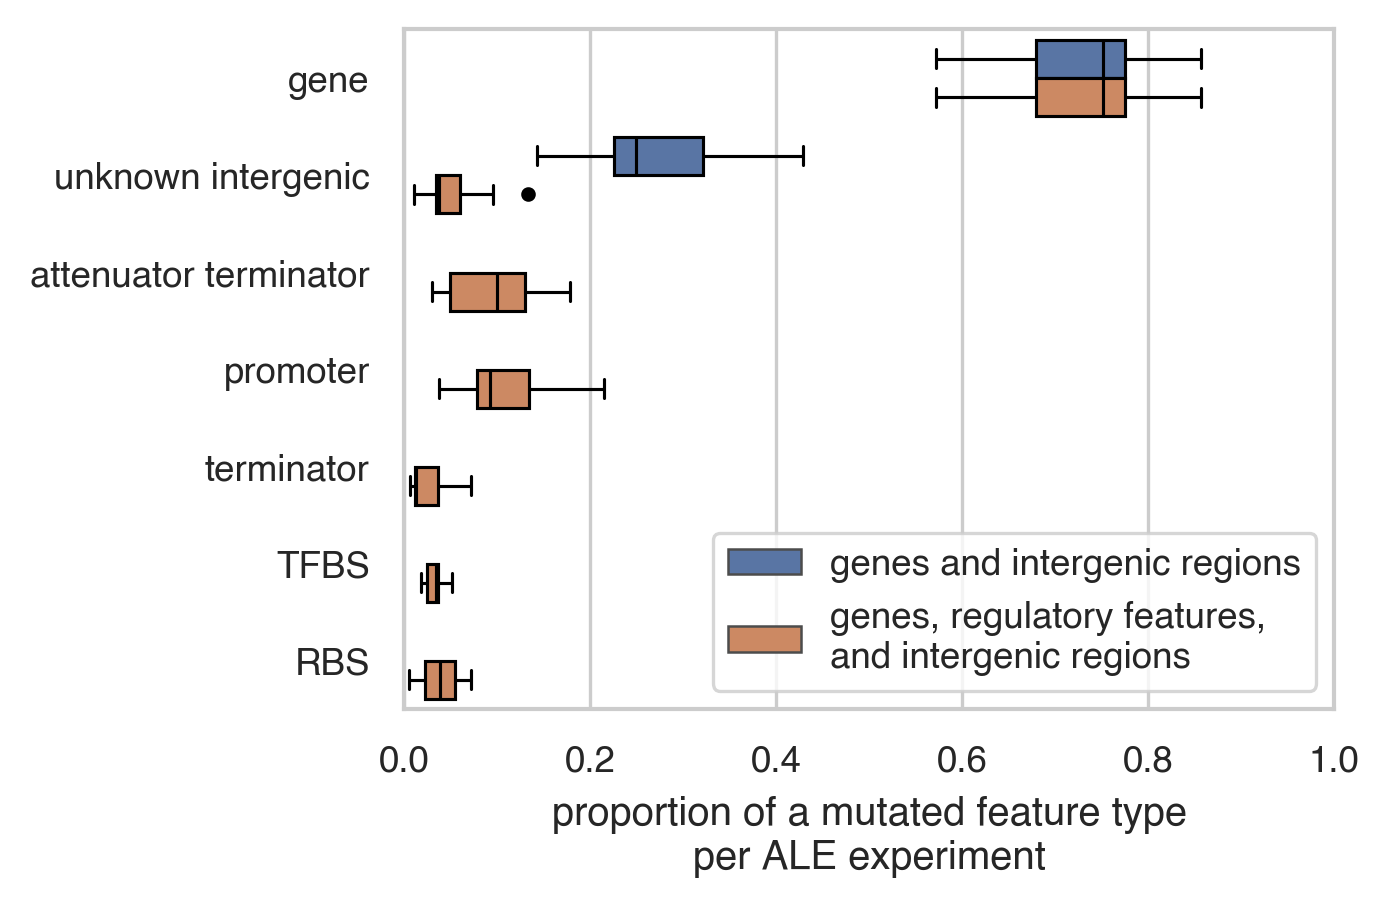

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("deep")

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'k', 'linewidth': 0.75},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': 'black'}
}

plt.figure(figsize=(4,3))
ax = sns.boxplot(
    data=feat_type_prop_df,
    x="proportion",
    y="feature type",
    hue="genome annotation",
    order=FEAT_ORDER_L,
#     showmeans=True,
    **boxplot_kwargs)

lgnd = ax.legend(prop={'family':"Helvetica"})
lgnd.get_texts()[0].set_text("genes and intergenic regions")
lgnd.get_texts()[1].set_text("genes, regulatory features,\nand intergenic regions")

# ax.set_title("Feature type mutation proportion\nfor ALE experiments")
# ax.set_title("The distribution of mutated features\nacross databased ALE experiments")
# ax.set_title("The impact of using richer genome annotations")

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")

ax.yaxis.label.set_visible(False)
# ax.set_ylabel("genomic feature type")
ax.set_xlabel("proportion of a mutated feature type\nper ALE experiment", fontname="Helvetica")
# sns.despine(ax=ax, top=True, right=True)
plt.xlim(0,1)
plt.savefig("fig.svg", format="svg")

(0, 1)

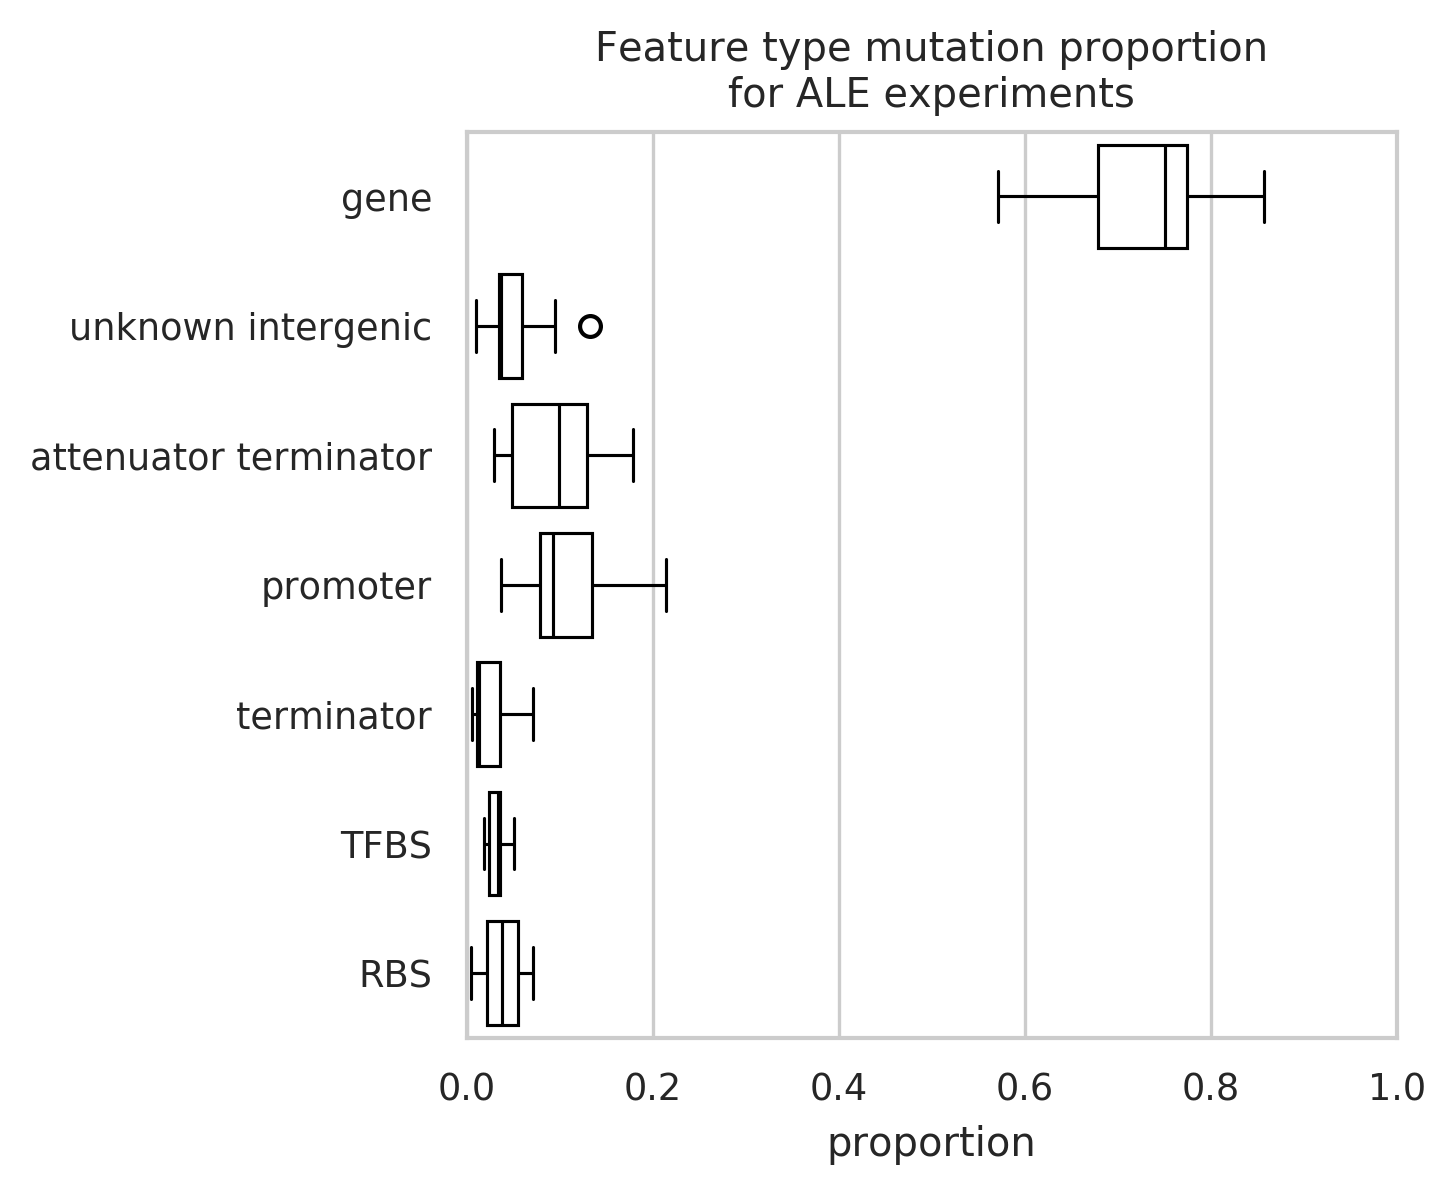

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("deep")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'k', 'linewidth': 0.75},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'}
}

plt.figure(figsize=(4,4))
ax = sns.boxplot(
    data=feat_type_prop_df[feat_type_prop_df["genome annotation"]=="genomic"],
    x="proportion",
    y="feature type",
    color="white",
    order=FEAT_ORDER_L,
#     showmeans=True,
    **boxplot_kwargs)
ax.set_title("Feature type mutation proportion\nfor ALE experiments")
ax.yaxis.label.set_visible(False)
# sns.despine(ax=ax, top=True, right=True)
plt.xlim(0,1)

Checking the proportion of genomic features involved in a convergence event

In [11]:
def _get_linked_feat_d_l(feat_name_or_id, feat_col, feat_link_col, mut_row):
    linked_feat_d_l = []
    linked_feat_l = []
    for k, vals in mut_row[feat_link_col].items():
        if feat_name_or_id in vals:
            linked_feat_l.append(k)
    for linked_feat in linked_feat_l:
        for d in mut_row[feat_col]:
            k = "RegulonDB ID"
            if feat_col == "regulators": k = "name"
            if d[k] == linked_feat:
                linked_feat_d_l.append(d)
    return linked_feat_d_l



def set_mut_feats_in_convergence(mut_row):
    for feat_d in mut_row["genomic features"]:
        # Check if there is convergence with genomic feature level.
        feat_d["convergence"] = False
        if feat_d["mutation set count"] > 1:
             feat_d["convergence"] = True
        # Check convergence on genetic level
        linked_genetic_feat_d_l = None
        if feat_d["convergence"] == False:
            linked_genetic_feat_d_l = _get_linked_feat_d_l(feat_d["RegulonDB ID"], "genetic features", "genetic feature links", mut_row)
            for d in linked_genetic_feat_d_l:
                if d["mutation set count"] > 1:
                    feat_d["convergence"] = True
                    break
        # Check if there is convergence with operon level.
        linked_operon_feat_d_l = None
        if feat_d["convergence"] == False and linked_genetic_feat_d_l != None:
            for genetic_linked_feat_d in linked_genetic_feat_d_l:
                linked_operon_feat_d_l = _get_linked_feat_d_l(genetic_linked_feat_d["RegulonDB ID"], "operons", "operon links", mut_row)
                for d in linked_operon_feat_d_l:
                    if d["mutation set count"] > 1:
                        feat_d["convergence"] = True
                        break
        # Check if there is convergence with regulon level.
        if feat_d["convergence"] == False and linked_operon_feat_d_l != None:
            for linked_operon_feat_d in linked_operon_feat_d_l:
                linked_regulon_feat_d_l = _get_linked_feat_d_l(linked_operon_feat_d["name"], "regulators", "regulator links", mut_row)
                for d in linked_regulon_feat_d_l:
                    if d["mutation set count"] > 1:
                        feat_d["convergence"] = True
                        break
        # Check if there is convergence with COG level.
        if feat_d["convergence"] == False and linked_operon_feat_d_l != None:  # COGs also uses operon links
            for linked_operon_feat_d in linked_operon_feat_d_l:
                linked_regulon_feat_d_l = _get_linked_feat_d_l(linked_operon_feat_d["name"], "COGs", "COG links", mut_row)
                for d in linked_regulon_feat_d_l:
                    if d["mutation set count"] > 1:
                        feat_d["convergence"] = True
                        break
        # Check if there is convergence with pathway level.
        if feat_d["convergence"] == False and linked_operon_feat_d_l != None:  # COGs also uses operon links
            for linked_operon_feat_d in linked_operon_feat_d_l:
                linked_regulon_feat_d_l = _get_linked_feat_d_l(linked_operon_feat_d["name"], "pathways", "pathway links", mut_row)
                for d in linked_regulon_feat_d_l:
                    if d["mutation set count"] > 1:
                        feat_d["convergence"] = True
                        break


for _, r in all_mut_df.iterrows():
    set_mut_feats_in_convergence(r)

In [12]:
# TODO: the only difference between this and set_mut_feats_in_convergence is teh if statement checking feat_d for
# "significant" or "convergent". Should consolidate logic into one function.
def set_mut_feats_in_signif_event(mut_row):
    for feat_d in mut_row["genomic features"]:
        # Check if there is convergence with genomic feature level.
        feat_d["significant event"] = False
        if feat_d["significant"]:
             feat_d["significant event"] = True
        # Check convergence on genetic level
        linked_genetic_feat_d_l = None
        if feat_d["significant event"] == False:
            linked_genetic_feat_d_l = _get_linked_feat_d_l(feat_d["RegulonDB ID"], "genetic features", "genetic feature links", mut_row)
            for d in linked_genetic_feat_d_l:
                if feat_d["significant"]:
                    feat_d["significant event"] = True
                    break
        # Check if there is convergence with operon level.
        linked_operon_feat_d_l = None
        if feat_d["significant event"] == False and linked_genetic_feat_d_l != None:
            for genetic_linked_feat_d in linked_genetic_feat_d_l:
                linked_operon_feat_d_l = _get_linked_feat_d_l(genetic_linked_feat_d["RegulonDB ID"], "operons", "operon links", mut_row)
                for d in linked_operon_feat_d_l:
                    if feat_d["significant"]:
                        feat_d["significant event"] = True
                        break
        # Check if there is convergence with regulon level.
        if feat_d["significant event"] == False and linked_operon_feat_d_l != None:
            for linked_operon_feat_d in linked_operon_feat_d_l:
                linked_regulon_feat_d_l = _get_linked_feat_d_l(linked_operon_feat_d["name"], "regulators", "regulator links", mut_row)
                for d in linked_regulon_feat_d_l:
                    if feat_d["significant"]:
                        feat_d["significant event"] = True
                        break
        # Check if there is convergence with COG level.
        if feat_d["significant event"] == False and linked_operon_feat_d_l != None:
            for linked_operon_feat_d in linked_operon_feat_d_l:
                linked_regulon_feat_d_l = _get_linked_feat_d_l(linked_operon_feat_d["name"], "COGs", "COG links", mut_row)
                for d in linked_regulon_feat_d_l:
                    if feat_d["significant"]:
                        feat_d["significant event"] = True
                        break
        # Check if there is convergence with pathway level.
        if feat_d["significant event"] == False and linked_operon_feat_d_l != None:
            for linked_operon_feat_d in linked_operon_feat_d_l:
                linked_regulon_feat_d_l = _get_linked_feat_d_l(linked_operon_feat_d["name"], "pathways", "pathway links", mut_row)
                for d in linked_regulon_feat_d_l:
                    if feat_d["significant"]:
                        feat_d["significant event"] = True
                        break


for _, r in all_mut_df.iterrows():
    set_mut_feats_in_signif_event(r)

In [13]:
feat_key_mut_prop_df = pd.DataFrame()
for exp, exp_mut_df in all_mut_df.groupby(["exp"]):
    exp_feat_type_count_d = dict()
    exp_feat_type_converge_count_d = dict()
    exp_feat_type_signif_converge_count_d = dict()
    for _, mut_row in exp_mut_df.iterrows():
        for feat_d in mut_row["genomic features"]:
            if feat_d["feature type"] not in exp_feat_type_count_d.keys():
                exp_feat_type_count_d[feat_d["feature type"]] = 1
            else: 
                exp_feat_type_count_d[feat_d["feature type"]] += 1
                
            if feat_d["convergence"]:
                if feat_d["feature type"] not in exp_feat_type_converge_count_d.keys():
                    exp_feat_type_converge_count_d[feat_d["feature type"]] = 1
                else: 
                    exp_feat_type_converge_count_d[feat_d["feature type"]] += 1
            if feat_d["significant event"]:
                if feat_d["feature type"] not in exp_feat_type_signif_converge_count_d.keys():
                    exp_feat_type_signif_converge_count_d[feat_d["feature type"]] = 1
                else: 
                    exp_feat_type_signif_converge_count_d[feat_d["feature type"]] += 1

                    
    for feat_type in exp_feat_type_count_d.keys():
        df1 = pd.DataFrame()
        df2 = pd.DataFrame()
        if feat_type in exp_feat_type_converge_count_d.keys():
            df1 = pd.DataFrame([[exp, feat_type, 'convergent', exp_feat_type_converge_count_d[feat_type]/exp_feat_type_count_d[feat_type]]],
                columns=["experiment", "feature type", "convergence type", "proportion"])
        if feat_type in exp_feat_type_signif_converge_count_d.keys():
            df2 = pd.DataFrame([[exp, feat_type, 'significant', exp_feat_type_signif_converge_count_d[feat_type]/exp_feat_type_count_d[feat_type]]],
                columns=["experiment", "feature type", "convergence type", "proportion"])
            
        if not df1.empty:
            feat_key_mut_prop_df = feat_key_mut_prop_df.append(df1)
        if not df2.empty:
            feat_key_mut_prop_df = feat_key_mut_prop_df.append(df2)
        
mask = feat_key_mut_prop_df["feature type"] == "unknown"
feat_key_mut_prop_df.loc[mask, "feature type"] = "unknown intergenic"
feat_key_mut_prop_df.head()

,experiment,feature type,convergence type,proportion
0,42C,gene,convergent,0.724359
0,42C,gene,significant,0.262821
0,42C,attenuator terminator,convergent,1.000000
0,42C,attenuator terminator,significant,0.909091
0,42C,unknown intergenic,convergent,0.645161


In [14]:
# temporary fix for a bug
feat_key_mut_prop_df["feature type"] = feat_key_mut_prop_df["feature type"].apply(lambda ft: "gene" if ft == "gene RegulonDB ID" else ft)
feat_key_mut_prop_df.head()

,experiment,feature type,convergence type,proportion
0,42C,gene,convergent,0.724359
0,42C,gene,significant,0.262821
0,42C,attenuator terminator,convergent,1.000000
0,42C,attenuator terminator,significant,0.909091
0,42C,unknown intergenic,convergent,0.645161


(0, 1.1)

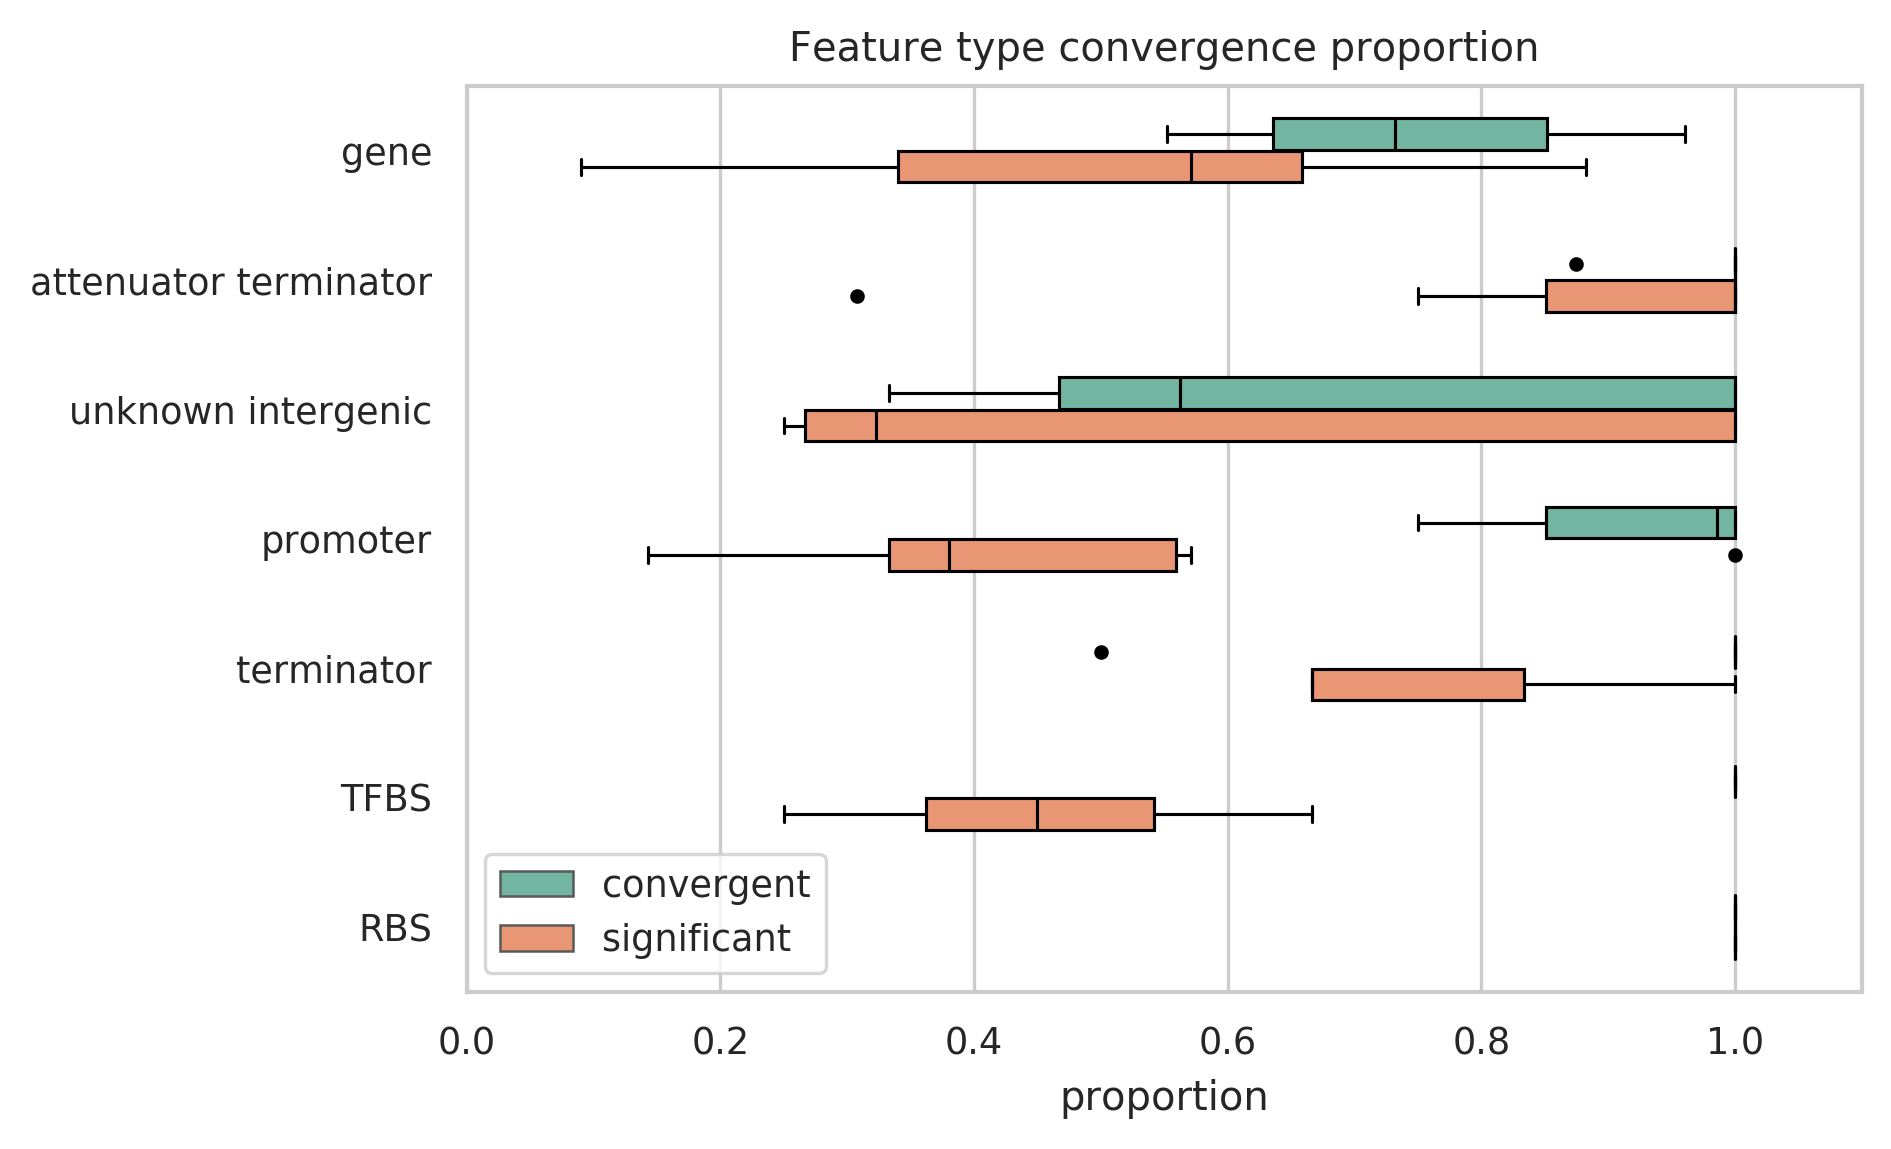

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set2")

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'k', 'linewidth': 0.75},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': 'black'}
}
ax = sns.boxplot(data=feat_key_mut_prop_df,
                 x="proportion",
                 y="feature type",
                 hue="convergence type",
                 width=0.5,
                 **boxplot_kwargs)
ax.set_title("Feature type convergence proportion")
ax.yaxis.label.set_visible(False)
ax.set_xlabel("proportion")
ax.legend().set_title('')
plt.xlim(0, 1.1)

In [16]:
feat_key_mut_prop_df=feat_key_mut_prop_df[feat_key_mut_prop_df["convergence type"]=="significant"]

In [17]:
geno_feat_cnt_d = dict()
for i, r in all_mut_df.iterrows():
    for f in r["genomic features"]:
        if f["feature type"] not in geno_feat_cnt_d.keys():
            geno_feat_cnt_d[f["feature type"]] = 0
        geno_feat_cnt_d[f["feature type"]] += 1
geno_feat_cnt_d

{'promoter': 163,
 'gene': 1099,
 'attenuator terminator': 116,
 'unknown': 93,
 'TFBS': 37,
 'terminator': 20,
 'RBS': 3}

In [18]:
feat_key_mut_prop_df.head()

,experiment,feature type,convergence type,proportion
0,42C,gene,significant,0.262821
0,42C,attenuator terminator,significant,0.909091
0,42C,unknown intergenic,significant,0.322581
0,42C,promoter,significant,0.360000
0,42C,terminator,significant,0.666667


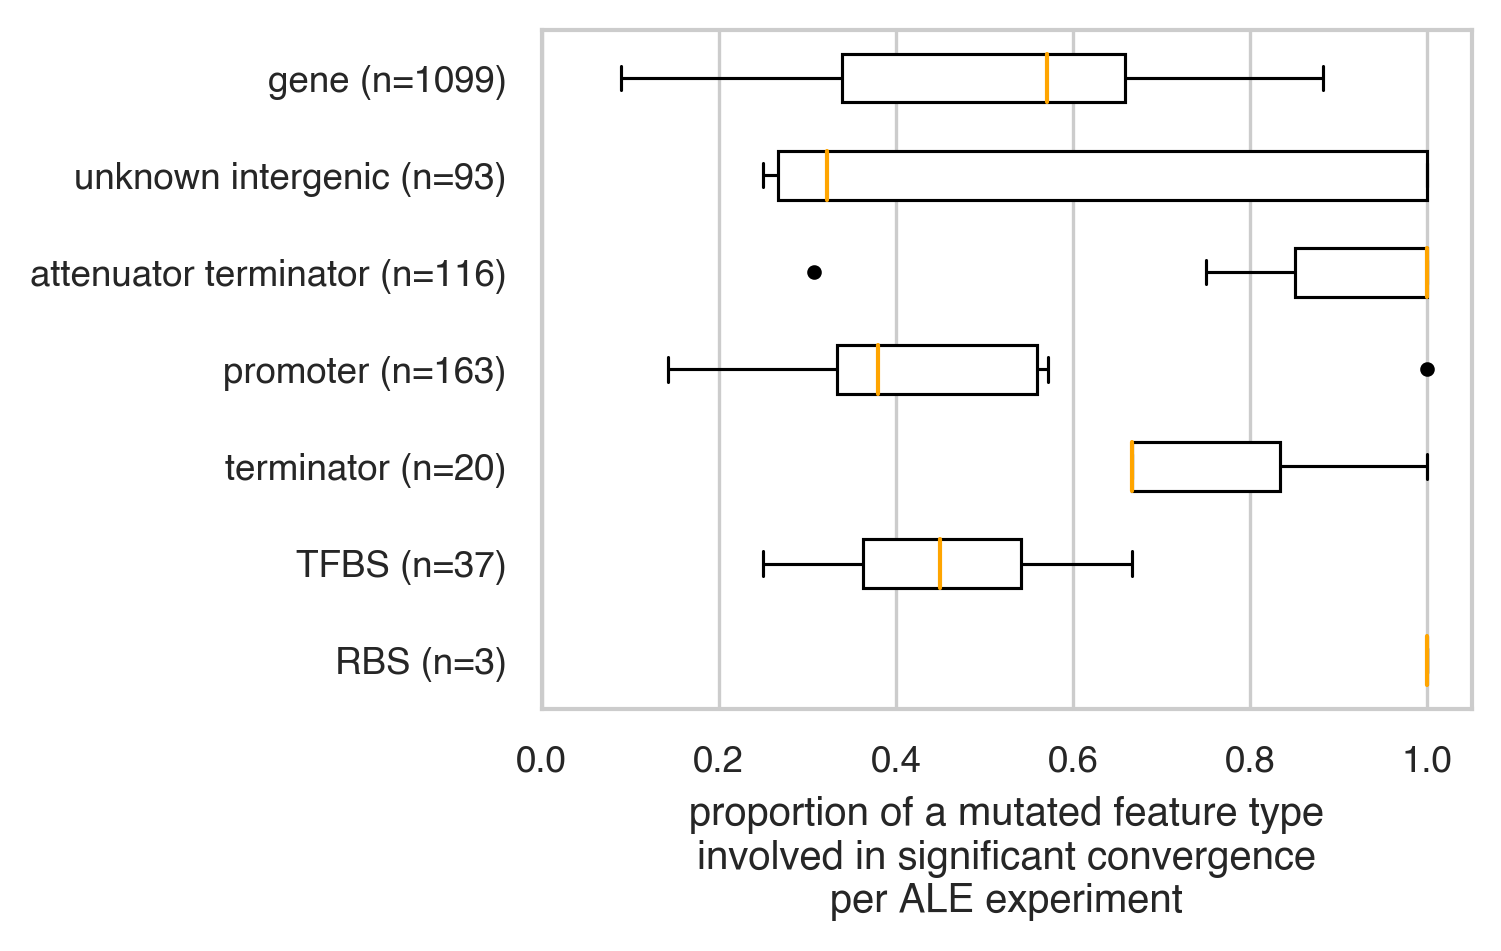

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 1},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}
plt.figure(figsize=(4, 3))
ax = sns.boxplot(data=feat_key_mut_prop_df,
                 x="proportion",
                 y="feature type",
                 width=0.5,
                 color="white",
                 order=FEAT_ORDER_L,
                 **boxplot_kwargs)
# ax.set_title("Mutated non-coding features\nare often involved in significant convergence")
ax.yaxis.label.set_visible(False)
ax.set_xlabel(
    "proportion of a mutated feature type\ninvolved in significant convergence\nper ALE experiment",
    fontname="Helvetica"
)

pos = range(len(feat_key_mut_prop_df["feature type"].unique()))
feat_medians_d = feat_key_mut_prop_df.groupby(
    ['feature type'])['proportion'].median().to_dict()
# !!! If going to reindex like below, make a copy of the DF so that it doesn't screw anything up
# # df = df.reset_index()  # Resetting index for the below annotations to work
# for i, label in zip(pos, ax.get_yticklabels()):
#     print(label)

# hack; I should be getting this information from the plot data
l = ["gene", "unknown intergenic", 'attenuator terminator',
     'promoter', 'terminator', 'TFBS', 'RBS']
# l.reverse()
new_yticks = []
for i in range(0, len(l)):
    feat = l[i]
    y = i
    x = median = feat_medians_d[feat]
    count_s = ""
    if feat == "unknown intergenic":
        count_s += "n=" + str(geno_feat_cnt_d["unknown"])
    else:
        count_s += "n=" + str(geno_feat_cnt_d[feat])
    f = l[i] + " (" + str(count_s) + ")"
    new_yticks.append(f)
    
    # The below would add the 'n=#' to the end of each plot row.
    # Currently instead adding 'n' to the row labels
#     ax.text(
#         1.05,  # putting it right beside the median makes things messing because it overlaps with quartile bars
#         y+0.15,
#         count_s
#     )
ax.set_yticklabels(new_yticks)
    
for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
    
plt.xlim(0, 1.05)
plt.savefig("fig.svg", format="svg")

In [53]:
import numpy as np
l = ["gene", "unknown intergenic", 'attenuator terminator',
     'promoter', 'terminator', 'TFBS', 'RBS']
for f in l:
    display(f, np.median(feat_key_mut_prop_df[feat_key_mut_prop_df["feature type"]==f]["proportion"]))

'gene'

0.5708969839404622

'unknown intergenic'

0.3225806451612903

'attenuator terminator'

1.0

'promoter'

0.38

'terminator'

0.6666666666666666

'TFBS'

0.45

'RBS'

1.0